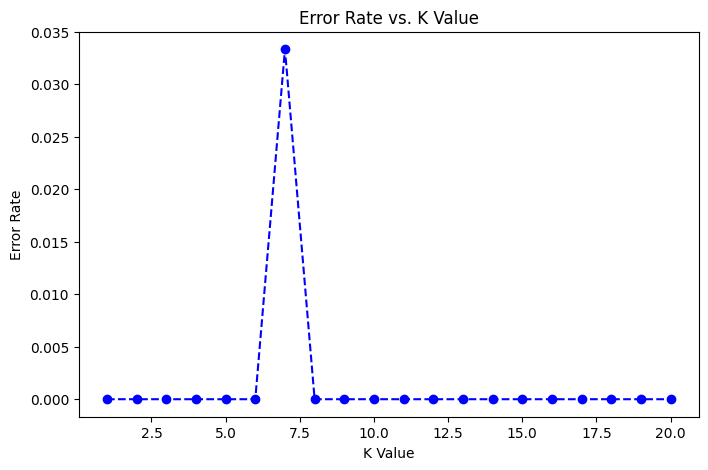


Optimal K value: 1

Model Accuracy: 1.00

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



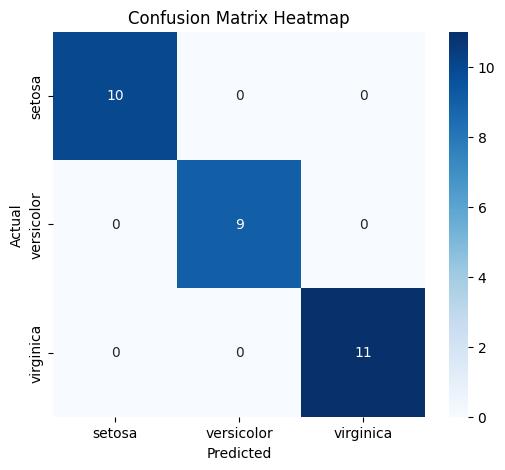

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the best value of K
error_rates = []
for k in range(1, 21):  # Try k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred_k))

# Plot error rates to find best K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K Value")
plt.show()

# Choose optimal K (smallest error rate)
best_k = np.argmin(error_rates) + 1
print(f"\nOptimal K value: {best_k}")

# Train KNN with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Display results
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the diabetes dataset
diabetes_data = load_diabetes()
X = diabetes_data.data
y = (diabetes_data.target > 140).astype(int)  # Creating a binary classification based on a threshold

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN classifier
k = 5  # Choosing k value
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy score and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display results
print(f'Accuracy Score: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion)


Accuracy Score: 0.6854
Confusion Matrix:
[[35 14]
 [14 26]]
